# Change-Point Clustering

Exploratory analysis of changepoint clustering on several manual trials.

In [1]:
%matplotlib inline

import exc_analysis.plotting as excplt
import exc_analysis.learning as lrn
import pandas as pd
import numpy as np
# import trajectories as traj
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('mitch-exp')

In [2]:
ls trial_data

manual_mitch_0522_01.csv      manual_orlando_1102_1405.csv
manual_mitch_0522_02.csv      manual_orlando_1102_1413.csv
manual_mitch_1101_2319.csv    manual_orlando_1102_1418.csv
manual_mitch_1101_2333.csv    manual_shyam_1101_2012.csv
manual_mitch_1102_1814.csv    manual_shyam_1102_1824.csv
manual_mitch_1102_1819.csv


In [3]:
# Load data
ddir = 'trial_data/'

fnames = ['manual_mitch_0522_01.csv']

dfs = []

for i, fn in enumerate(fnames):
    dfs.append(pd.read_csv(ddir + fn))
    dfs[i].set_index('Time', inplace=True)

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms
Time,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0


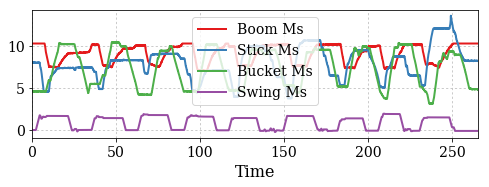

In [4]:
# Plot measurement time series
plt.figure(figsize=(8, 8))

for i, df in enumerate(dfs):
    ax = plt.subplot(3, 1, i + 1)
    df[['Boom Ms', 'Stick Ms', 'Bucket Ms', 'Swing Ms']].plot(ax=ax)

In [5]:
# Compute velocity and store in dataframe
for i, df in enumerate(dfs):
    _, rate = lrn.compute_rate(ddir + fnames[i])
    rate = np.insert(rate, 0, np.zeros(4), axis=0)
    df['Boom Vel'] = rate[:, 0]
    df['Stick Vel'] = rate[:, 1]
    df['Bucket Vel'] = rate[:, 2]
    df['Swing Vel'] = rate[:, 3]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel
Time,,,,,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.000000,0.000000,0.0
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0,0.0,0.051612,0.028404,0.0
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0,0.0,0.051612,0.028404,0.0
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.045793,0.026227,0.0
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.036485,0.022109,0.0


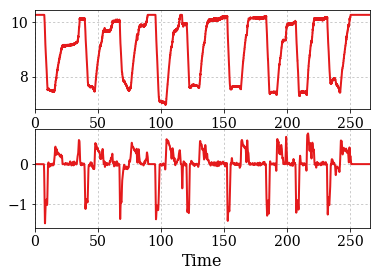

In [6]:
# Plot measurement and velocity on boom actuator
plt.figure()
plt.subplot(211)
dfs[0]['Boom Ms'].plot()

plt.subplot(212)
dfs[0]['Boom Vel'].plot()

In [7]:
# Label the motion classes on each actuator
lbls = []
thresholds = [0.2, 0.2, 0.2, 0.05]

for i, df in enumerate(dfs):
    lbls.append(np.zeros((len(df), 4)))
    
    for j in range(4):
        lbls[i][:, j] = lrn.get_action_primitives(df[excplt.labels[j] + ' Vel'].values,
                                                 thresholds[j])
    df['Boom Lbl'] = lbls[i][:, 0]
    df['Stick Lbl'] = lbls[i][:, 1]
    df['Bucket Lbl'] = lbls[i][:, 2]
    df['Swing Lbl'] = lbls[i][:, 3]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl
Time,,,,,,,,,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.000000,0.000000,0.0,2.0,2.0,2.0,2.0
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0,0.0,0.051612,0.028404,0.0,2.0,2.0,2.0,2.0
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0,0.0,0.051612,0.028404,0.0,2.0,2.0,2.0,2.0
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.045793,0.026227,0.0,2.0,2.0,2.0,2.0
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.036485,0.022109,0.0,2.0,2.0,2.0,2.0


## Quick sanity check!

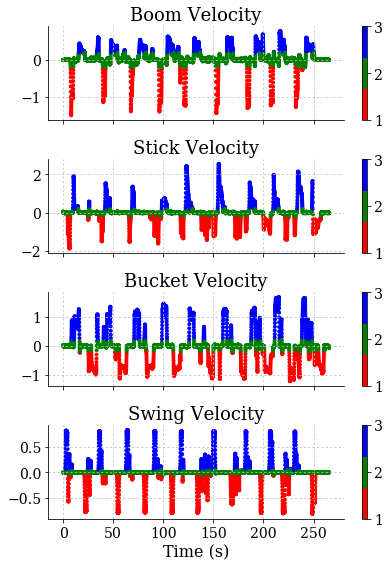

In [8]:
# Illustrate motion classes
for df, lbl in zip(dfs, lbls):
#     plt.figure()
    lrn.plot_action_primitives(df, lbl)

In [9]:
# Form unique action primitives from different combinations
# of actuator motion

for df, lbl in zip(dfs, lbls):
    lbl_set = list(set([tuple(lb) for lb in lbl]))
    
    df['Action Prim'] = (df[[l + ' Lbl' for l in excplt.labels]]
        .apply(lambda x: lbl_set.index(tuple(x)), axis=1))

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Prim
Time,,,,,,,,,,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.000000,0.000000,0.0,2.0,2.0,2.0,2.0,15
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0,0.0,0.051612,0.028404,0.0,2.0,2.0,2.0,2.0,15
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0,0.0,0.051612,0.028404,0.0,2.0,2.0,2.0,2.0,15
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.045793,0.026227,0.0,2.0,2.0,2.0,2.0,15
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.036485,0.022109,0.0,2.0,2.0,2.0,2.0,15


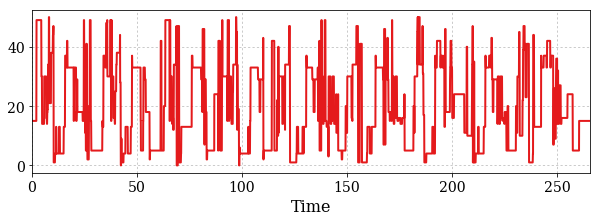

In [10]:
# View action
plt.figure(figsize=(10, 3))
dfs[0]['Action Prim'].plot()

# End-Effector Space

Use forward kinematics and add X, Y, Z columns to dfs

In [22]:
import exc_analysis.kinematics as kin
from mpl_toolkits.mplot3d import Axes3D

In [23]:
# Forward kinematics for all samples
for df in dfs:
    temp = kin.forward_kin_array(df[[l + ' Ms' for l in excplt.labels]]
                                 .values)
    df['X'] = temp[:, 0]
    df['Y'] = temp[:, 1]
    df['Z'] = temp[:, 2]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,Swing Lbl,Action Prim,Boom Accel,Stick Accel,Bucket Accel,Swing Accel,Accel Mag,X,Y,Z
Time,,,,,,,,,,,,,,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.000000,...,2.0,15,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,57.648484,0.0,24.547671
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0,0.0,0.051612,...,2.0,15,0.0,5.161234e-02,2.840420e-02,0.0,5.891207e-02,57.770759,0.0,24.641957
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0,0.0,0.051612,...,2.0,15,0.0,-4.163336e-17,1.387779e-17,0.0,4.388542e-17,57.719959,0.0,24.622873
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.045793,...,2.0,15,0.0,-5.819483e-03,-2.176905e-03,0.0,6.213317e-03,57.648484,0.0,24.547671
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.036485,...,2.0,15,0.0,-9.308338e-03,-4.117909e-03,0.0,1.017852e-02,57.648484,0.0,24.547671


# Acceleration

Diff the velocity columns.

In [13]:
tmp = dfs[0][[l + ' Vel' for l in excplt.labels]].diff().fillna(0).values
tmp.shape

(5217, 4)

In [14]:
for df in dfs:
    tmp = df[[l + ' Vel' for l in excplt.labels]].diff().fillna(0).values
    df['Boom Accel'] = tmp[:, 0]
    df['Stick Accel'] = tmp[:, 1]
    df['Bucket Accel'] = tmp[:, 2]
    df['Swing Accel'] = tmp[:, 3]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Prim,Boom Accel,Stick Accel,Bucket Accel,Swing Accel
Time,,,,,,,,,,,,,,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.000000,...,0.0,2.0,2.0,2.0,2.0,15,0.0,0.000000e+00,0.000000e+00,0.0
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0,0.0,0.051612,...,0.0,2.0,2.0,2.0,2.0,15,0.0,5.161234e-02,2.840420e-02,0.0
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0,0.0,0.051612,...,0.0,2.0,2.0,2.0,2.0,15,0.0,-4.163336e-17,1.387779e-17,0.0
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.045793,...,0.0,2.0,2.0,2.0,2.0,15,0.0,-5.819483e-03,-2.176905e-03,0.0
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.036485,...,0.0,2.0,2.0,2.0,2.0,15,0.0,-9.308338e-03,-4.117909e-03,0.0


In [15]:
# accel magnitude
for df in dfs:
    df['Accel Mag'] = (df[[l + ' Accel' for l in excplt.labels]]
        .apply(np.linalg.norm, axis=1))

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Prim,Boom Accel,Stick Accel,Bucket Accel,Swing Accel,Accel Mag
Time,,,,,,,,,,,,,,,,,,,,,
0.005514,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.000000,...,2.0,2.0,2.0,2.0,15,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00
0.063504,0.0,0.0,0.0,0.0,10.272,7.970000,4.591245,0.0,0.0,0.051612,...,2.0,2.0,2.0,2.0,15,0.0,5.161234e-02,2.840420e-02,0.0,5.891207e-02
0.115737,0.0,0.0,0.0,0.0,10.272,7.970000,4.614792,0.0,0.0,0.051612,...,2.0,2.0,2.0,2.0,15,0.0,-4.163336e-17,1.387779e-17,0.0,4.388542e-17
0.202312,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.045793,...,2.0,2.0,2.0,2.0,15,0.0,-5.819483e-03,-2.176905e-03,0.0,6.213317e-03
0.302759,0.0,0.0,0.0,0.0,10.272,8.003731,4.591245,0.0,0.0,0.036485,...,2.0,2.0,2.0,2.0,15,0.0,-9.308338e-03,-4.117909e-03,0.0,1.017852e-02


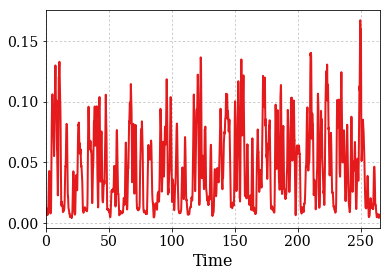

In [16]:
# Plot smoothed acceleration magnitude
plt.figure()
dfs[0]['Accel Mag'].rolling(window=20, min_periods=10).mean().plot()

# Consolidate

In [24]:
# Consolidate using diff and boolean indexing
cdfs = []

for df in dfs:
    idx = np.where(np.diff(df['Action Prim']))[0] + 1
    cdfs.append(df.iloc[idx])

cdfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,Swing Lbl,Action Prim,Boom Accel,Stick Accel,Bucket Accel,Swing Accel,Accel Mag,X,Y,Z
Time,,,,,,,,,,,,,,,,,,,,,
2.137246,0.0,0.000000,0.0,0.000000,10.272,7.970000,4.567698,0.000000,0.0,-0.000186,...,3.0,49,0.0,0.008446,0.006905,0.031874,0.033689,57.821426,0.000000,24.661263
4.481277,0.0,-0.328552,0.0,0.000000,10.272,7.970000,4.591245,1.709223,0.0,-0.235418,...,3.0,30,0.0,-0.110919,-0.000535,-0.072407,0.132462,-7.971485,57.218145,24.641957
4.788401,0.0,-1.000000,0.0,-0.242218,10.272,7.713000,4.591245,1.750456,0.0,-1.061082,...,2.0,16,0.0,-0.092760,-0.002545,-0.098146,0.135069,-10.486785,57.740855,25.374447
4.841249,0.0,-1.000000,0.0,-0.247589,10.272,7.616625,4.591245,1.741620,0.0,-1.114417,...,1.0,14,0.0,-0.053335,-0.002616,-0.091811,0.106211,-10.033202,58.161695,25.655482
5.802683,0.0,-1.000000,0.0,0.293030,10.272,6.637484,4.591245,1.343031,0.0,-1.539568,...,2.0,16,0.0,-0.052005,0.000646,0.076092,0.092168,14.043619,60.588322,28.700133


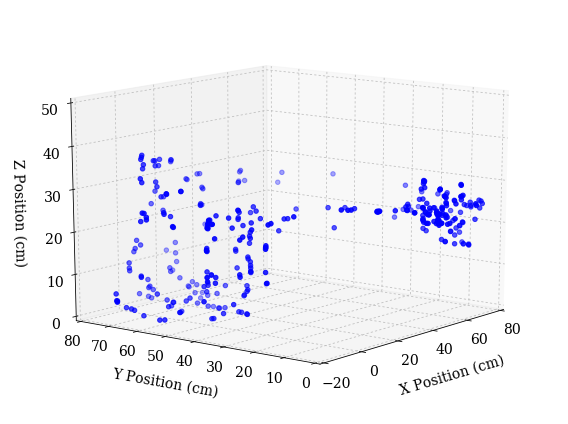

In [25]:
# View samples as end-effector positions in 3D space
plt.figure(figsize=(8, 6))
ax = plt.gca(projection='3d')
excplt.plot_states_3d(cdfs[0], ax=ax, c='b')
# excplt.plot_states_3d(cdfs[1], c='r')
# excplt.plot_states_3d(cdfs[2], c='g')

plt.tight_layout()

## Quiver Plot

Test plot_quiver_3d

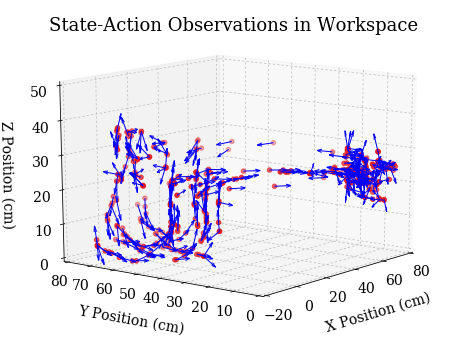

In [26]:
# Same as above but with velocity illustrated
plt.figure(figsize=(8, 6))
excplt.plot_quiver_3d(cdfs[0])

# Examine Changepoints

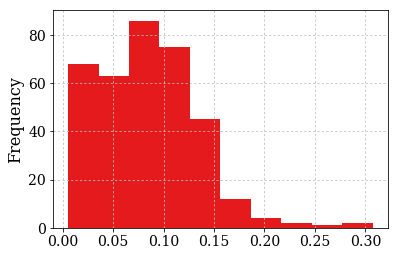

In [27]:
cdfs[0]['Accel Mag'].plot(kind='hist')

In [48]:
# Find the third quartile
q = 0.60
cdfs[0]['Accel Mag'].quantile(q)

0.094373296978454549

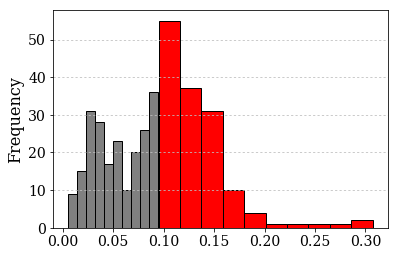

In [49]:
# Illustrate portion of accel mags above and below threshold
thresh = cdfs[0]['Accel Mag'].quantile(q)

plt.figure()
(cdfs[0]['Accel Mag'][cdfs[0]['Accel Mag'] < thresh]
     .plot(kind='hist', color='grey', ec='k'))
(cdfs[0]['Accel Mag'][cdfs[0]['Accel Mag'] > thresh]
     .plot(kind='hist', color='r', ec='k'))

plt.grid(axis='x')

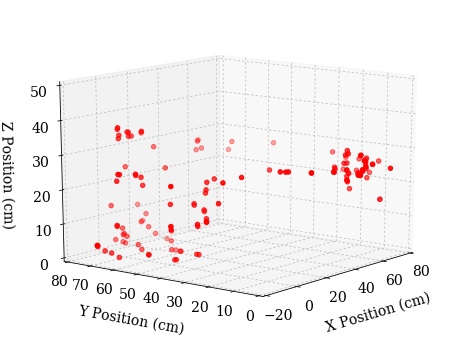

In [50]:
# States corresponding to the above plot
plt.figure(figsize=(8, 6))
cs = ['r', 'g', 'b']

for c, cdf in zip(cs, cdfs):
    ax = plt.gca(projection='3d')
    excplt.plot_states_3d(cdf[cdf['Accel Mag'] > thresh], ax=ax, c=c)

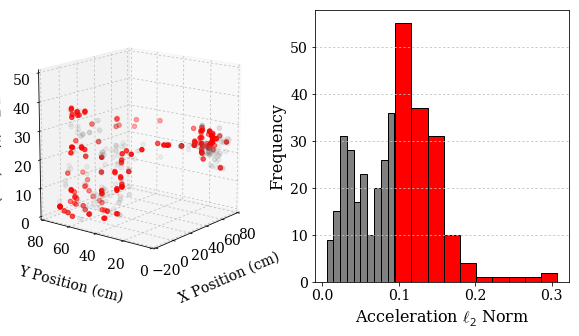

In [51]:
# Compose the previous two cell plots together for all dataframes
plt.figure(figsize=(10, 5))

for i, cdf in enumerate(cdfs):
    ax = plt.subplot(1, 2, 2*i + 1, projection='3d')
    thresh = cdf['Accel Mag'].quantile(q)
    
    excplt.plot_states_3d(cdf[cdf['Accel Mag'] <= thresh], ax, c='grey', alpha=0.1)
    excplt.plot_states_3d(cdf[cdf['Accel Mag'] > thresh], ax, c='r')

    ax = plt.subplot(1, 2, (i + 1)*2)
    (cdf['Accel Mag'][cdf['Accel Mag'] < thresh]
         .plot(kind='hist', color='grey', ec='k'))
    (cdf['Accel Mag'][cdf['Accel Mag'] > thresh]
         .plot(kind='hist', color='r', ec='k'))
    ax.set_xlabel('Acceleration $\ell_2$ Norm')
    ax.grid(axis='x')


# GMM Clustering

In [52]:
from sklearn import mixture
from itertools import cycle

In [53]:
# Populate new dataframe with indices above accel threshold
adfs = []

for cdf in cdfs:
    thresh = cdf['Accel Mag'].quantile(q)
    adfs.append(cdf[cdf['Accel Mag'] > thresh].copy())
    
assert id(adfs) != id(cdfs)

adfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,Swing Lbl,Action Prim,Boom Accel,Stick Accel,Bucket Accel,Swing Accel,Accel Mag,X,Y,Z
Time,,,,,,,,,,,,,,,,,,,,,
4.481277,0.000000,-0.328552,0.0,0.000000,10.272,7.970000,4.591245,1.709223,0.0,-0.235418,...,3.0,30,0.0,-0.110919,-0.000535,-0.072407,0.132462,-7.971485,57.218145,24.641957
4.788401,0.000000,-1.000000,0.0,-0.242218,10.272,7.713000,4.591245,1.750456,0.0,-1.061082,...,2.0,16,0.0,-0.092760,-0.002545,-0.098146,0.135069,-10.486785,57.740855,25.374447
4.841249,0.000000,-1.000000,0.0,-0.247589,10.272,7.616625,4.591245,1.741620,0.0,-1.114417,...,1.0,14,0.0,-0.053335,-0.002616,-0.091811,0.106211,-10.033202,58.161695,25.655482
6.794077,0.000000,-0.207947,0.0,0.000000,10.272,4.890293,4.591245,1.592395,0.0,-1.528510,...,2.0,16,0.0,0.110413,-0.005550,-0.024090,0.113147,-1.443218,66.810038,34.958740
7.099779,-0.219055,0.000000,0.0,-0.221466,10.272,4.604195,4.591245,1.592395,0.0,-0.503937,...,1.0,14,0.0,0.173514,-0.004130,-0.015756,0.174277,-1.456859,67.441519,36.085305


In [54]:
# Drop nans from diffing process (?)
adfs[0].dropna(inplace=True)

In [55]:
# Build color iterables for clusters
color_iter = cycle(['r', 'g', 'navy', 'gold', 'darkorange',
                    'cornflowerblue', 'grey', 'purple'])

cs = ['r', 'g', 'navy', 'gold', 'darkorange',
                    'cornflowerblue', 'grey', 'purple']

cm = plt.get_cmap('Paired')
cm_iter = cycle([cm(i) for i in range(12)])

In [56]:
# aadfs[0]['Swing Ms Scale'] = (aadfs[0]['Swing Ms']).copy()

In [57]:
# Cluster with BayesianGaussianMixture, dp prior, 400 iter,
# wt param 1, and count results with bincount

# trial number to examine
tr = 0

gmm0 = (mixture.BayesianGaussianMixture(n_components=7, 
    weight_concentration_prior=1,
    weight_concentration_prior_type='dirichlet_process',
    max_iter=800)
        .fit(adfs[tr][['Boom Ms', 'Stick Ms', 'Bucket Ms', 
                        'Swing Ms']]))

gmm0lbls = gmm0.predict(adfs[tr][[lbl + ' Ms' for lbl in excplt.labels]])
adfs[tr]['Cluster'] = gmm0lbls

print(np.bincount(adfs[tr]['Cluster']))

[19  7 21 37 30 20  9]


In [58]:
# Take forward kin of those results
xm, ym, zm = kin.forward_kin_array(gmm0.means_).T

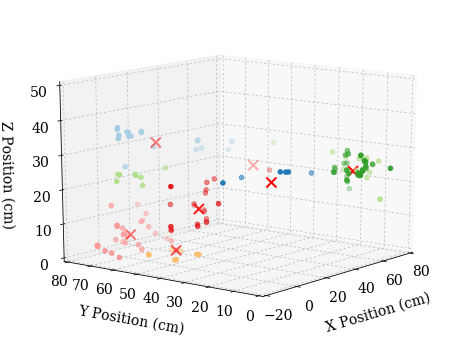

In [59]:
# Plot results
plt.figure(figsize=(8, 6))

ax3d = excplt.plot_gmm_results(adfs[tr][['X', 'Y', 'Z']].values, 
                               gmm0lbls, cm_iter)

xm, ym, zm = kin.forward_kin_array(gmm0.means_).T

ax3d.scatter(xm, ym, zm, marker='x', c=cs, s=100)

plt.xlabel('X Position (cm)', family='serif', labelpad=15, fontsize=14)
plt.ylabel('Y Position (cm)', family='serif', labelpad=15, fontsize=14)
ax3d.set_zlabel('Z Position (cm)', family='serif', labelpad=10, fontsize=14)

# plt.savefig('figs/cpts/cpt_clusters_act_space.pdf', pad_inches=0.5)

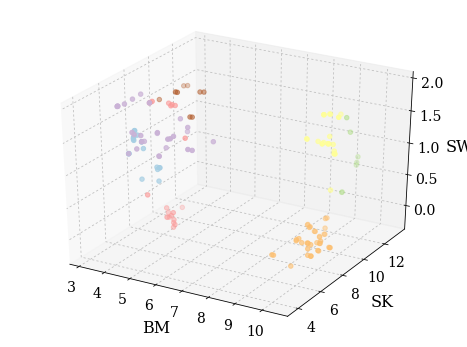

In [60]:
plt.figure(figsize=(8, 6))
ax = plt.gca(projection='3d')

ax.scatter(adfs[tr]['Bucket Ms'], adfs[tr]['Stick Ms'],
           adfs[tr]['Swing Ms'], c=gmm0lbls, cmap=cm)
ax.set_xlabel('BM', labelpad=10)
ax.set_ylabel('SK', labelpad=10)
ax.set_zlabel('SW', labelpad=10)

___

## Build Subgoal Model

In [166]:
## DROP UNUSED PARTITION
# means = np.vstack((gmm0.means_[0:4], gmm0.means_[5:]))
# covs = np.vstack((gmm0.covariances_[0:4], gmm0.covariances_[5:]))

## ALL CLUSTERS ARE USED
means = gmm0.means_[1:]
covs = gmm0.covariances_[1:]

In [167]:
means

array([[  9.95540432,   6.95322371,   4.99319878,   0.13408883],
       [  7.60956617,   5.25976862,   4.51882105,   1.59087035],
       [  7.99598676,   8.89034223,   9.67896224,   1.5795221 ],
       [  7.64708399,   6.84225728,   5.18545599,   1.62098518],
       [ 10.03499501,   4.70668424,   4.88152551,   1.39328951],
       [ 10.08954021,   8.28946916,   9.683276  ,   0.03451985],
       [ 10.08496606,   7.28878599,   4.65652686,   1.6593445 ]])

In [168]:
covs

array([[[ 0.1544485 , -0.06600545,  0.02692577, -0.00626369],
        [-0.06600545,  0.5410626 , -0.09099746, -0.01367758],
        [ 0.02692577, -0.09099746,  0.25489471,  0.01827256],
        [-0.00626369, -0.01367758,  0.01827256,  0.03639987]],

       [[ 0.19762386,  0.20054788,  0.05713468, -0.03048717],
        [ 0.20054788,  0.73107127,  0.03584853,  0.02912171],
        [ 0.05713468,  0.03584853,  0.34555933, -0.11800224],
        [-0.03048717,  0.02912171, -0.11800224,  0.06223157]],

       [[ 0.53718158,  0.19764914, -0.12030567, -0.0465474 ],
        [ 0.19764914,  0.92863636, -0.19194874, -0.03735566],
        [-0.12030567, -0.19194874,  0.40386728,  0.03439292],
        [-0.0465474 , -0.03735566,  0.03439292,  0.05140958]],

       [[ 0.05422029,  0.01835469,  0.01539084, -0.01702137],
        [ 0.01835469,  3.48708867, -0.98288817, -0.04343591],
        [ 0.01539084, -0.98288817,  0.91961025, -0.0658417 ],
        [-0.01702137, -0.04343591, -0.0658417 ,  0.02728946]],



___

# Stochastic Transition Matrix

see GMM-model-creation-experimental.ipynb for similar work

In [190]:
import pickle

In [169]:
aadfs[0]['Labels'] = lbls
aadfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,...,X,Y,Z,Boom Accel,Stick Accel,Bucket Accel,Swing Accel,Accel Mag,Cluster,Labels
Time,,,,,,,,,,,,,,,,,,,,,
4.481277,0.0,-0.328552,0.0,0.000000,10.272,7.970000,4.591245,1.709223,0.0,-0.235418,...,-7.971485,57.218145,24.641957,0.0,-0.110919,-0.000535,-0.072407,0.132462,7,7
4.531285,0.0,-0.531342,0.0,0.000000,10.272,8.003731,4.591245,1.743584,0.0,-0.373168,...,-9.911452,56.790059,24.547671,0.0,-0.137749,-0.003212,-0.083969,0.161357,7,7
4.581293,0.0,-0.759857,0.0,0.000000,10.272,8.003731,4.591245,1.751438,0.0,-0.529934,...,-10.357170,56.710464,24.547671,0.0,-0.156766,-0.005540,-0.093002,0.182361,7,7
4.635864,0.0,-1.000000,0.0,-0.216949,10.272,8.003731,4.591245,1.751438,0.0,-0.690397,...,-10.357170,56.710464,24.547671,0.0,-0.160463,-0.003261,-0.098826,0.188482,7,7
4.685893,0.0,-1.000000,0.0,-0.249786,10.272,7.873625,4.591245,1.752420,0.0,-0.840745,...,-10.497515,57.161341,24.913729,0.0,-0.150348,-0.001639,-0.101615,0.181474,7,7


In [181]:
df = aadfs[0][aadfs[0]['Labels'] != 0].copy()

In [182]:
df['Labels'] = df['Labels'].values - 1
set(df['Labels'].values)

{0, 1, 2, 3, 4, 5, 6}

In [57]:
## IF NOT ALL LABELS USED
# np.place(lbls, lbls==5, 4)
# np.place(lbls, lbls==6, 5)
# np.place(lbls, lbls==7, 6)

In [183]:
lbl_sequence = df[df['Labels'].diff() != 0]['Labels'].values

In [184]:
lbl_sequence

array([6, 4, 3, 2, 0, 6, 4, 3, 2, 5, 6, 1, 3, 2, 0, 6, 4, 1, 2, 5, 0, 4, 1,
       3, 2, 5, 0, 4, 3, 2, 5, 0, 4, 1, 3, 2, 4, 1, 3, 2, 5, 0, 4, 1, 3])

In [185]:
pairs = np.array([(lbl_sequence[i], lbl_sequence[i+1]) for i in range(len(lbl_sequence) - 1)])
pairs[:20]

array([[6, 4],
       [4, 3],
       [3, 2],
       [2, 0],
       [0, 6],
       [6, 4],
       [4, 3],
       [3, 2],
       [2, 5],
       [5, 6],
       [6, 1],
       [1, 3],
       [3, 2],
       [2, 0],
       [0, 6],
       [6, 4],
       [4, 1],
       [1, 2],
       [2, 5],
       [5, 0]])

In [186]:
sg_dim = len(set(lbls))
permutations = np.array([[i, j] for i in range(sg_dim) for j in range(sg_dim)])

trans = np.zeros((sg_dim, sg_dim))
for p in permutations:
    a, b = p
    trans[a, b] = np.count_nonzero((pairs == p[::-1]).all(axis=1))

trans

array([[ 0.,  0.,  2.,  0.,  0.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  5.,  0.,  1.],
       [ 0.,  1.,  0.,  7.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.,  3.,  0.,  0.],
       [ 4.,  0.,  1.,  0.,  0.,  0.,  3.],
       [ 0.,  0.,  5.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [187]:
trans_normal = trans / np.sum(trans, axis=0)
trans_normal

array([[ 0.        ,  0.        ,  0.25      ,  0.        ,  0.        ,
         0.8       ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.625     ,
         0.        ,  0.25      ],
       [ 0.        ,  0.16666667,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.83333333,  0.        ,  0.        ,  0.375     ,
         0.        ,  0.        ],
       [ 0.66666667,  0.        ,  0.125     ,  0.        ,  0.        ,
         0.        ,  0.75      ],
       [ 0.        ,  0.        ,  0.625     ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.33333333,  0.        ,  0.        ,  0.        ,  0.        ,
         0.2       ,  0.        ]])

In [188]:
model = {'means': means,
         'covs': covs,
         'trans': trans_normal,
         'queues': []}

In [189]:
model

{'covs': array([[[ 0.1544485 , -0.06600545,  0.02692577, -0.00626369],
         [-0.06600545,  0.5410626 , -0.09099746, -0.01367758],
         [ 0.02692577, -0.09099746,  0.25489471,  0.01827256],
         [-0.00626369, -0.01367758,  0.01827256,  0.03639987]],
 
        [[ 0.19762386,  0.20054788,  0.05713468, -0.03048717],
         [ 0.20054788,  0.73107127,  0.03584853,  0.02912171],
         [ 0.05713468,  0.03584853,  0.34555933, -0.11800224],
         [-0.03048717,  0.02912171, -0.11800224,  0.06223157]],
 
        [[ 0.53718158,  0.19764914, -0.12030567, -0.0465474 ],
         [ 0.19764914,  0.92863636, -0.19194874, -0.03735566],
         [-0.12030567, -0.19194874,  0.40386728,  0.03439292],
         [-0.0465474 , -0.03735566,  0.03439292,  0.05140958]],
 
        [[ 0.05422029,  0.01835469,  0.01539084, -0.01702137],
         [ 0.01835469,  3.48708867, -0.98288817, -0.04343591],
         [ 0.01539084, -0.98288817,  0.91961025, -0.0658417 ],
         [-0.01702137, -0.04343591, -0

In [191]:
with open('gmm_model_0526.pkl', 'wb') as pkf:
    pickle.dump(model, pkf)

In [205]:
color_iter = cycle(['r', 'g', 'navy', 'gold', 'darkorange',
                    'cornflowerblue', 'grey', 'purple'])

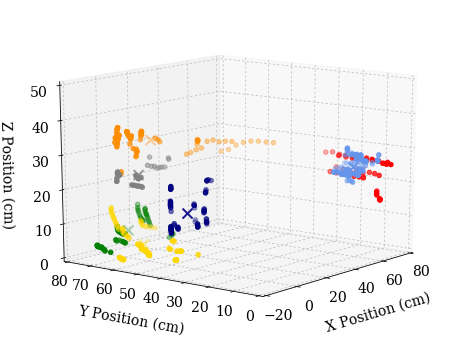

In [206]:
# Plot results
plt.figure(figsize=(8, 6))

ax3d = excplt.plot_gmm_results(df[['X', 'Y', 'Z']].values, 
                               df['Labels'].values, color_iter)

xm, ym, zm = kin.forward_kin_array(means).T

ax3d.scatter(xm, ym, zm, marker='x', c=cs[:7], s=100)

plt.xlabel('X Position (cm)', family='serif', labelpad=15, fontsize=14)
plt.ylabel('Y Position (cm)', family='serif', labelpad=15, fontsize=14)
ax3d.set_zlabel('Z Position (cm)', family='serif', labelpad=10, fontsize=14)

# plt.savefig('figs/cpts/cpt_clusters_act_space_2.pdf', pad_inches=0.5)

## Acceleration Magnitude Plot

Plot the observations with a colormap representing the magnitude of acceleration.

In [47]:
adfs[tr]['Accel Mag'].describe()

count    5217.000000
mean        0.046030
std         0.044525
min         0.000000
25%         0.011957
50%         0.028248
75%         0.069581
max         0.316458
Name: Accel Mag, dtype: float64

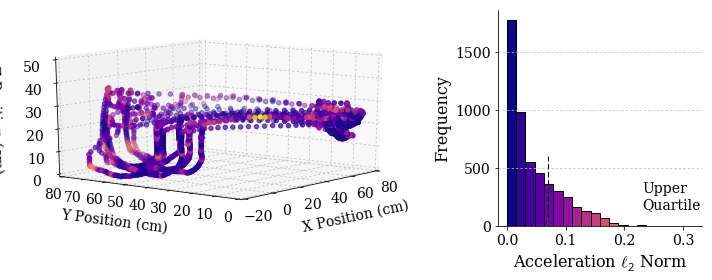

In [48]:
tr = 0

fig = plt.figure(figsize=(10, 4))

gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax1 = plt.subplot(gs[0], projection='3d')
ax1 = excplt.plot_states_3d(adfs[tr].iloc[::2], ax1,
                            c=adfs[tr]['Accel Mag'].iloc[::2], cmap='plasma')
# s = ax1.collections[0]
# s.set_clim([0, 0.5])
# cbar = plt.colorbar(s)

ax2 = plt.subplot(gs[1])

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('plasma')

# Plot histogram.
n, bins, patches = ax2.hist(adfs[tr]['Accel Mag'], ec='k', bins=20)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

tr=0
    
thresh = adfs[tr]['Accel Mag'].quantile(0.75)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Acceleration $\ell_2$ Norm')

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.grid(axis='x')
ax2.add_line(plt.Line2D([thresh, thresh], [80, 600], color='k', 
                        linestyle='--', linewidth=1))
ax2.text(0.23, 150, 'Upper\nQuartile', fontsize=14)

plt.tight_layout()

# plt.savefig('figs/cpts/accel_norm.pdf', pad_inches=0.5)

____

# Changepoint Clustering using Command Rate

Instead of velocity as action, use operator input command, and threshold the rate of change of command to get changepoints.

In [193]:
for df in dfs:
    df['Boom Cmd Rate'] = df['Boom Cmd'].diff().fillna(0)
    df['Stick Cmd Rate'] = df['Stick Cmd'].diff().fillna(0)
    df['Bucket Cmd Rate'] = df['Bucket Cmd'].diff().fillna(0)
    df['Swing Cmd Rate'] = df['Swing Cmd'].diff().fillna(0)

In [195]:
for df in dfs:
    df['Cmd Rate Mag'] = (df[[l + ' Cmd Rate' for l in excplt.labels]]
        .apply(np.linalg.norm, axis=1))

In [196]:
mdfs = []

for df in dfs:
    mdfs.append(df[df['Cmd Rate Mag'] > 0.01])

In [197]:
mdfs[0]['Cmd Rate Mag'].describe()

count    1049.000000
mean        0.388974
std         0.334242
min         0.010027
25%         0.084806
50%         0.316977
75%         0.602363
max         1.593129
Name: Cmd Rate Mag, dtype: float64

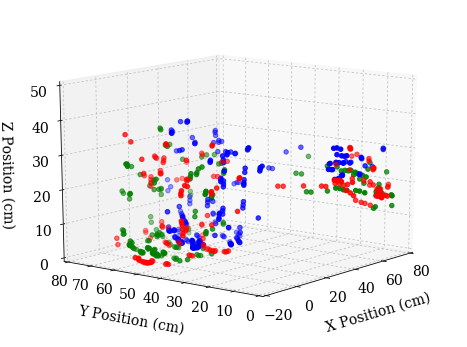

In [198]:
plt.figure(figsize=(8, 6))
cs = ['b', 'g', 'r']
ax = plt.gca(projection='3d')

for c, mdf in zip(cs, mdfs):
    excplt.plot_states_3d(mdf[mdf['Cmd Rate Mag'] > mdf['Cmd Rate Mag'].quantile(0.75)], ax=ax, c=c)

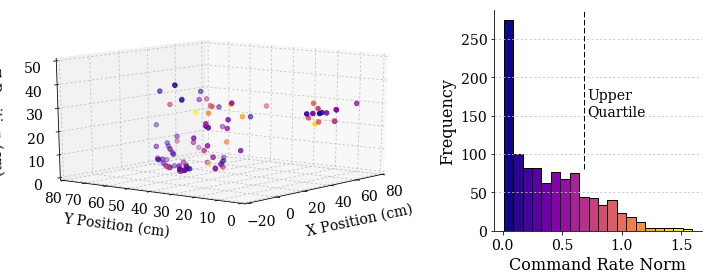

In [202]:
tr = 0
q = 0.8

fig = plt.figure(figsize=(10, 4))
tmdf = mdfs[tr][mdfs[tr]['Cmd Rate Mag'] > mdfs[tr]['Cmd Rate Mag'].quantile(q)]

gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[2, 1])
ax1 = plt.subplot(gs[0], projection='3d')
ax1 = excplt.plot_states_3d(tmdf.iloc[::2], ax1,
                            c=tmdf['Cmd Rate Mag'].iloc[::2], cmap='plasma')
# s = ax1.collections[0]
# s.set_clim([0, 0.5])
# cbar = plt.colorbar(s)

ax2 = plt.subplot(gs[1])

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('plasma')

# Plot histogram.
n, bins, patches = ax2.hist(mdfs[tr]['Cmd Rate Mag'], ec='k', bins=20)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
thresh = mdfs[tr]['Cmd Rate Mag'].quantile(q)

ax2.set_ylabel('Frequency')
ax2.set_xlabel('Command Rate Norm')

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.grid(axis='x')
ax2.add_line(plt.Line2D([thresh, thresh], [80, 600], color='k', 
                        linestyle='--', linewidth=1))
ax2.text(thresh + 0.03, 150, 'Upper\nQuartile', fontsize=14)

plt.tight_layout()

# plt.savefig('figs/cpts/cmd_rate_norm.pdf', pad_inches=0.5)

___